# Demo 4: Speed of sound in quantum matter #

Combo hardware and simulator!! Running this entire notebook will use **8 jobs**.

## Introduction ##

Sound is a type of vibrational energy. In our every day lives, sound propagates through the air around us at 343 m/s ("the speed of sound"), where molecules bump into each other and create traveling waves (vibrations); the speed of these sound waves depends on the temperature of the medium they're traveling through. The physics of room temperature air ($\sim$300 K) is classical... but what happens for very cold gases like the atoms in the Bose-Einstein condensate (BEC) you create with Oqtant's hardware ($\sim$100 nK)?

Studying sound propagation in quantum matter reveals a wealth of information about the elementary ways in which the matter can be excited. In this demo, we will show how to produce sound in a BEC, which propagates extremely slowly by everyday standards - only a few millimeters per second!

Producing this kind of sound is straightforward using Oqtant by creating a barrier suddenly and watching the wave of density propagate symmetrically outward. The wave of density is predominantly made of excitations known as "phonons," which are a low-energy excitations in the condensate in the form of sound waves. A phonon is a quantum of vibrational energy (sound) whereas the more familiar photon is a quantum of electromagnetic energy (light). The name "phonon" is actually derived from the same Greek root *phon* (meaning *voice* or *sound*) as words like "telephone" and "symphony!"

In addition to exploring the speed of sound in the BEC using the Oqtant hardware, this demo notebook showcases how the Oqtant simulator can be used to observe the same behavior. The simulation predicts a very similar speed of sound, and we are able to see more details about the BEC dynamics. We encourage users to run this portion of the demo even if the hardware is currently offline.

For further reading, see the paper [Propagation of Sound in a Bose-Einstein Condensate](https://web.archive.org/web/20010614204054id_/http://amo.mit.edu:80/~bec/publish/papers/prl/PRL00553.pdf) which used a very similar experiment to perform the same measurement of the speed of sound. If you're still interested in learning more, the paper [Sound propagation in a Bose-Einstein condensate at finite temperatures](https://browse.arxiv.org/abs/0909.3455) goes much more in-depth about how the interaction between the BEC portion of the cloud and the thermal portion of the cloud can lead to even more types of sound. 

<script
  src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"
  type="text/javascript">
</script>

## Imports and user authentication ##

In [8]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory

qmf = QuantumMatterFactory()

### Authenticate automatically ###

The easiest way to authenticate as an Oqtant user is to execute the following cell.  This will activate a widget that will let you sign in.  
If popups are blocked, or you are on a system that does not support this method, please follow the steps just below to authenticate manually instead.   
Note that currently the *automatic authentication method is only compatible with classic jupyter notebooks*, and not jupyter lab, nanohub, binder, colab, etc.

In [ ]:
qmf.get_login()

### Authenticate manually ###

If you cannot use the automatic authentication method above, you can instead authenticate using a slightly more manual process:  

1. Copy your access token from [oqtant.infleqtion.com/oqtantAPI](https://oqtant.infleqtion.com/oqtantAPI)
2. Paste that token just below and execute the cell (the if statement keeps the code from executing if you already authenticated above)

In [5]:
if qmf.login.access_token == "":
    qmf.login.access_token = "Paste your token here between the quotes!"

### Get client ###

At this point you should have a valid access token and be able to establish a *client* for communicating with the Oqtant REST service.  Executing the cell just below should show your current job quota limits.

In [ ]:
qmf.get_client()

## Create a list of Barrier jobs with varying in-trap times ##

In order to visualize the propagation of sound, we will create a series of Barrier jobs to image the sound wave at different in-trap times. The barrier is turned on suddenly at time $t=0$ to create the sound wave, and is left on until the image is taken. The first job in our list of matter objects will contain no barrier, so that we have a baseline BEC distribution for data analysis. The subsequent jobs will sweep the in-trap time from 1 ms to 5 ms in steps of 1 ms.   

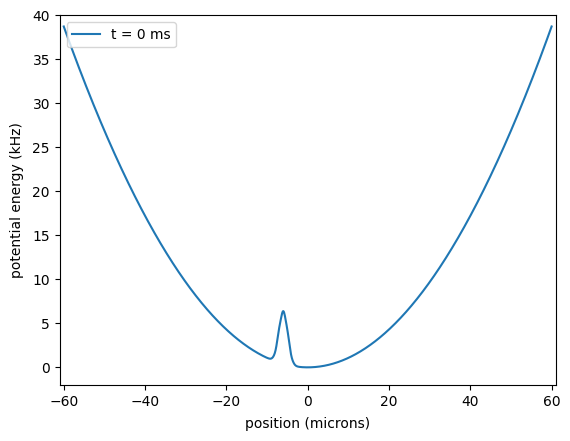

In [4]:
# Define parameters - play around with these and see how they affect the data!
time_final = (
    5  # ms - Longest in-trap time to be used.  Try making this shorter or longer!
)
it_times = np.arange(
    1, time_final + 1, 1
)  # A list of in-trap times from 1ms to "time_final" ms, in steps of 1ms
matters_it = []  # Initialize list to hold matter objects
height = 6  # kHz - barrier height.  What happens if this gets higher?
position = -6  # um - center location of barrier.  Try moving this around!
temp = 50  # nK - desired cloud temperature.  Will the zeroth sound disappear if we go to higher temperatures?

# Create a quantum matter object with NO barrier for establishing a baseline BEC distribution
matter_baseline = qmf.create_quantum_matter(
    temperature=temp,
    lifetime=float(it_times[0]),
    image="IN_TRAP",
    name="Demo #4: no barrier",
)

matters_it.append(matter_baseline)

# Loop over in-trap times to populate list of matter objects with barriers and varying in-trap times
for time in it_times:
    # Create barrier
    barrier = qmf.create_barrier(
        positions=2 * [position],
        heights=2 * [height],
        widths=2 * [1],
        times=[0, float(time)],
    )

    # Append matter object to list
    matters_it.append(
        qmf.create_quantum_matter(
            temperature=temp,
            lifetime=float(time),
            barriers=[barrier],
            image="IN_TRAP",
            name=f"Demo #4: barrier lifetime = {time:0.0f} ms",
        )
    )

# Plot what the potential looks like at time t=0
matters_it[-1].show_potential(times=[0], ylimits=[-2, 40])

## Submit the jobs to the Quantum Matter Service ##

In [5]:
submission = [matter.submit(track=True) for matter in matters_it]

Submitting 1 job(s):

- Job: Demo #4: no barrier
  Job ID: 550f6c33-405e-4c59-a4fd-1919cc66e6f3

Tracking 1 job(s):

- Job: Demo #4: no barrier
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: Demo #4: barrier lifetime = 1 ms
  Job ID: a2d02ace-dedf-43cf-99c1-c4883a97a028

Tracking 1 job(s):

- Job: Demo #4: barrier lifetime = 1 ms
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: Demo #4: barrier lifetime = 2 ms
  Job ID: 57dad55c-3a5b-4850-9dd8-5831d22224a1

Tracking 1 job(s):

- Job: Demo #4: barrier lifetime = 2 ms
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: Demo #4: barrier lifetime = 3 ms
  Job ID: 917e9eb5-8ef9-4661-8aac-f5a79866ba9c

Tracking 1 job(s):

- Job: Demo #4: barrier lifetime = 3 ms
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: Demo #4: barrier lifetime = 4 ms
  Job ID: d593f6b9-d276-487e-b639-8291dde83580

Tracking 1 job(s):

- Job: Demo #4: barrier lifetime

## Retrieve and plot results ##

Now we can analyze the data from our jobs. To best observe the density wave, we first subtract the baseline image of the cloud that was taken without the density wave (the first job in our list of jobs). Subtracting the baseline helps us see the wave that was formed. Below, we plot the subtraction of these two images, as well as column sums of the images to more clearly see the sound wave traveling through the BEC.

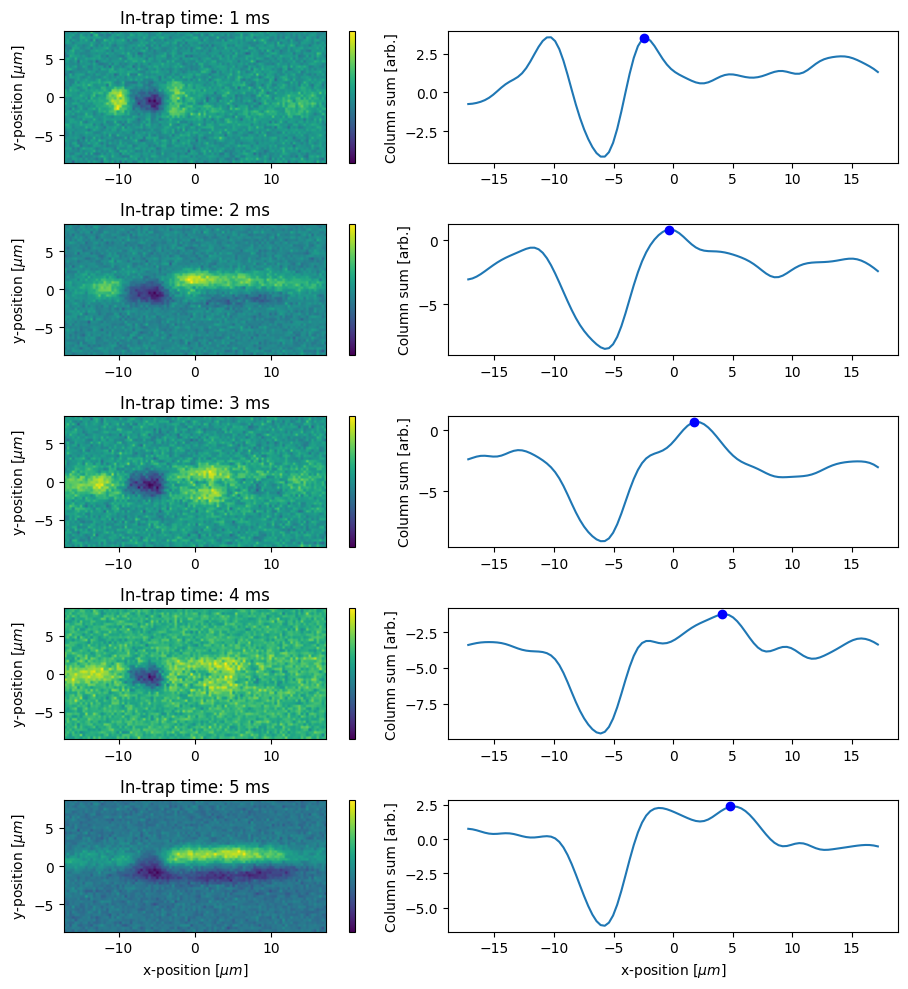

In [6]:
max_positions = []  # To store the maximum density positions during data processing
window_x, window_y = (100, 50)  # Window widths (pixels) for plotting
filter_width = 3  # Width (pixels) for filtering/smoothing data

# Get hardware results
for matter in matters_it:
    matter.get_result()

# Get baseline data from the job without a barrier
matter_baseline.get_result()
im_baseline = matter_baseline.output.get_image_data()

# Set up subplot array for plotting
fig, axs = plt.subplots(len(it_times), 2, figsize=(10, 2 * len(it_times)))

# Loop over varying in-trap times
for i, matter in enumerate(matters_it[1:]):
    # Load data from the job
    job = qmf.load_matter_from_job_id(matter.job_id)

    # Extract data from output
    pix_cal = job.output.it_plot.pixcal
    im = job.output.get_image_data()
    rows, cols = im.shape

    # Subtract baseline image to more clearly see the density wave
    im = im - im_baseline

    # Create a column sum of the image to simplify data processing
    col_sum = np.sum(im, axis=0)
    col_sum = gaussian_filter(col_sum, filter_width)

    # Find the location of peak density to the right of the initial barrier
    idx_left = int(cols / 2 + position / pix_cal)
    idx_right = int(cols / 2 + window_x / 2 + position / pix_cal)
    idx_center = int(window_x / 2 + position / pix_cal)
    indexMax = np.argmax(col_sum[idx_left:idx_right]) + idx_center
    max_positions.append(pix_cal * (indexMax - window_x / 2))

    # Plot the image of the density wave
    extent = (
        -pix_cal * window_x / 2,
        pix_cal * window_x / 2,
        -pix_cal * window_y / 2,
        pix_cal * window_y / 2,
    )
    im_fig = axs[i, 0].imshow(
        im[
            int(rows / 2 - window_y / 2) : int(rows / 2 + window_y / 2),
            int(cols / 2 - window_x / 2) : int(cols / 2 + window_x / 2),
        ],
        extent=extent,
    )
    axs[i, 0].set_ylabel(r"y-position [$\mu m$]")
    axs[i, 0].set_title(f"In-trap time: {it_times[i]:.0f} ms")
    cbar = plt.colorbar(im_fig, ax=axs[i, 0])
    cbar.set_ticks([])
    if i == len(it_times) - 1:
        axs[i, 0].set_xlabel(r"x-position [$\mu m$]")

    # Plot the column sum and location of peak density
    axs[i, 1].plot(
        pix_cal * np.linspace(-window_x / 2, window_x / 2, num=window_x),
        col_sum[int(cols / 2 - window_x / 2) : int(cols / 2 + window_x / 2)],
    )
    axs[i, 1].plot(
        max_positions[-1], col_sum[int(cols / 2 - window_x / 2 + indexMax)], "bo"
    )
    axs[i, 1].set_ylabel("Column sum [arb.]")
    if i == len(it_times) - 1:
        axs[i, 1].set_xlabel(r"x-position [$\mu m$]")

fig.tight_layout()

Now, we can find the location of the peak density of the sound wave. These locations are plotted versus time, and the data is fit to a line. The slope of this line is the speed of sound in the BEC!

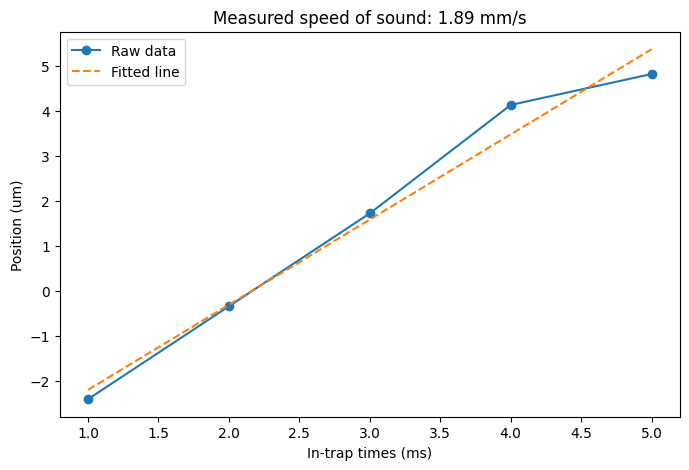

In [7]:
# Line function used for fitting
def line(x, a, b):
    return a * x + b


# Calculate the speed of sound from the data by fitting peak density position over time to a line
initial_guess = np.array([2, max_positions[0]])  # Initial guess of fit parameters
bl = initial_guess - [1.5, 10]  # Lower bounds
bu = initial_guess + [1.5, 10]  # Upper bounds

popt, _ = opt.curve_fit(
    line, it_times, max_positions, p0=initial_guess, bounds=(bl, bu)
)

# Plot position of the peak density versus in-trap time
plt.figure(figsize=(8, 5))
plt.title(f"Measured speed of sound: {popt[0]:0.2f} mm/s")
plt.plot(it_times, np.array(max_positions), marker="o", label="Raw data")
plt.plot(it_times, line(it_times, *popt), "--", label="Fitted line")
plt.legend()
plt.xlabel("In-trap times (ms)")
plt.ylabel("Position (um)")

plt.show()

The data can sometimes be a little noisy due to shot-to-shot fluctuations in the atom number or atom density, any small residual motion of the BEC, etc. However you should see that the fitted result is in the neighborhood of a $2\,mm/s$ speed of sound (using the default notebook parameters). This is over 100,000 times SLOWER than the speed of sound for room temperature air! 

# Re-run the same experiment with the simulator #

Next, let's run the same job with the simulator! The simulator stores the BEC at every time step, so we only need to re-run the experimental job with the longest in-trap time. We can re-create the job that was run in our experiment in order to run on the simulator. 

In [8]:
# we're working on calibrating our barrier heights, but for now we use this scale factor
# for better agreement between simulation and experiment
experiment_simulation_scale_factor = 2
height_scaled = height / experiment_simulation_scale_factor

barrier = qmf.create_barrier(
    positions=2 * [position],
    heights=2 * [height_scaled],
    widths=2 * [1],
    times=[0, float(time)],
)

matter_sim = qmf.create_quantum_matter(
    temperature=temp,
    lifetime=float(time_final),
    barriers=[barrier],
    image="IN_TRAP",
    name="Demo#4: Simulator speed of sound",
)

matter_sim.submit(sim=True)
matter_sim.get_result()

submitted simulation
ground state calculation in progress       
ground state calculation complete          
trapped simulation in progress             
trapped simulation complete                   
Simulation complete.


## Plot the simulator data ##

The two plots below animate the density of the BEC, both as an images and as a column sum, so you can see the sound wave traveling across the cloud.

In [9]:
# Plot animations of the BEC density
den = matter_sim.sim.animate_density()
HTML(den.to_jshtml())

In [10]:
# Plot animations of the 1D density profiles
den = matter_sim.sim.animate_profiles()
HTML(den.to_jshtml())

## Analyze the simulator results ##

Let's analyze the simulation data in a similar way to how we analyzed the hardware data. The initial BEC density distribution at time $t=0$ is subtracted from the density at each timestep saved by the simulator to establish a baseline. This tells us how the density wave is evolving over time. The speed of sound is calculated by finding the location of the peak density versus time and fitting this to a line.

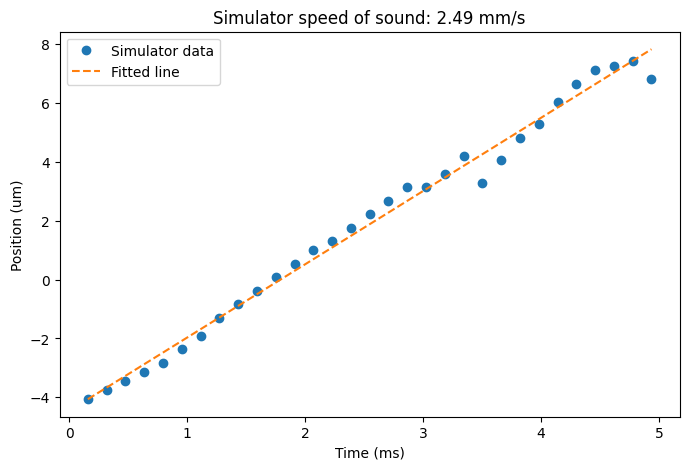

In [11]:
# Get the position and time grid for the simulation data.
# Don't forget to convert from simulation units to experimental units!
times = matter_sim.sim.get_times()
dx, Lx, xs = matter_sim.sim.get_grids(time_ms=0)

# times = np.array(matter_sim.sim.times) * matter_sim.sim.qm_potential.sim_time_to_oqt
# xs = (
#    np.array(matter_sim.sim.wavefunction.three_d_grid.x[0])
#    * matter_sim.sim.qm_potential.sim_length_to_oqt
# )
idx1 = 1  # first time index where the density wave appears
times_fit = times[
    idx1:
]  # List of times corresponding to the list of peak positions below

# Get initial cloud density before density wave begins for baseline subtraction
_, _, _, density_baseline = matter_sim.sim.get_column_densities(time_ms=0)

# Initialize arrays
densities = np.zeros(
    (len(xs), len(times))
)  # Store the density distribution column sum over time
posns = []  # position of peak densities at each timestep

# Extract simulated density wave data from each timestep
for i, time in enumerate(times):
    _, _, _, density = matter_sim.sim.get_column_densities(time_ms=time)
    densities[:, i] = density - density_baseline
    posns.append(
        xs[np.argmax(densities[:, i])]
    )  # Store the position of the peak density

# Ignore the first 'idx1' points when fitting to a line
posns_fit = posns[idx1:]

# Fit peak density positions to a line
initial_guess = np.array([2, posns_fit[0]])
bl = initial_guess - [1.5, 10]
bu = initial_guess + [1.5, 10]

popt_sim, _ = opt.curve_fit(
    line, times_fit, posns_fit, p0=initial_guess, bounds=(bl, bu)
)

# Plot the peak density positions versus time in the simulator
plt.figure(figsize=(8, 5))
plt.title(f"Simulator speed of sound: {popt_sim[0]:0.2f} mm/s")
plt.plot(times_fit, posns_fit, "o", label="Simulator data")
plt.plot(times_fit, line(times_fit, *popt_sim), "--", label="Fitted line")
plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Position (um)")
plt.show()

## 2D plot of the simulator density wave ##

Since we have more time steps, we can also make a nice visualization of the sound propagating outward from the barrier.

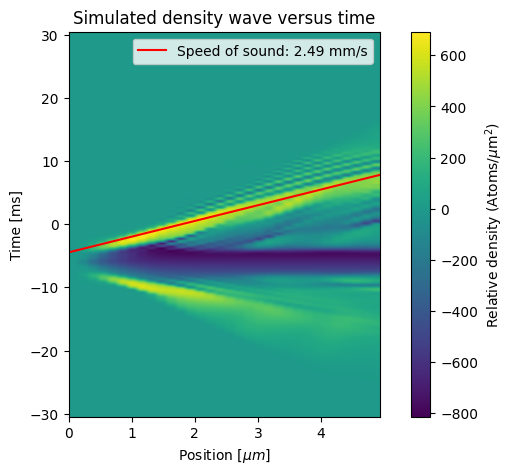

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(
    np.flip(densities, axis=0), aspect=0.1, extent=(times[0], times[-1], xs[0], xs[-1])
)
ax.plot(
    times,
    line(times, *popt_sim),
    "r-",
    label=f"Speed of sound: {popt_sim[0]:0.2f} mm/s",
)
ax.set_xlabel(r"Position [$\mu m$]")
ax.set_ylabel("Time [ms]")
plt.legend()
plt.colorbar(im, ax=ax, label="Relative density (Atoms/$\\mu$m$^2$)")
ax.set_title(f"Simulated density wave versus time")
plt.show()

How does this number compare to the result that you found above on the hardware? Remember that the Oqtant simulator describes only the condensed atoms. Try varying the temperature of the quantum matter job for the hardware. How does the speed of sound change?

Additionally, we see smaller waves traveling faster than the sound speed. Waves traveling faster than the local speed of sound are shock waves, which we are more familiar with from explosions and aircraft traveling in classical fluids. We can't see them on the experiment for the 5 kHz barrier, but have included suggestions and references below for adapting this demo to their study.

# Conclusion #

Now we know more about how sound works in both classical (air) and quantum (BEC) matter! To explore even deeper, try:
* slowly ramping on a barrier and then releasing it to propagate a negative density wave.
* increasing the barrier height to see how it affects the speed of sound speed. Eventually you will begin shocking the BEC to create shock waves - check out the paper [Dispersive and classical shock waves in Bose-Einstein condensates and gas dynamics](https://www.researchgate.net/profile/Volker-Schweikhard/publication/235771764_On_Dispersive_and_Classical_Shock_Waves_in_Bose-Einstein_Condensates_and_Gas_Dynamics/links/09e4150806af706d5a000000/On-Dispersive-and-Classical-Shock-Waves-in-Bose-Einstein-Condensates-and-Gas-Dynamics.pdf) for more information.
* colliding sound waves created by two different barriers. What happens when they overlap? (Remember --  these are waves!)
* increasing the temperature -- does sound require a BEC? 
* extending the length of the quantum matter job to tens of milliseconds. The sound wave is actually a superposition of the collective modes (like the dipole mode) of the magnetic trap.  Which collective mode(s) survive at longer times?
    -learn more about collective modes in [Demo 3: Collective Modes](https://oqtant-docs.infleqtion.com/examples/demos/demo_3_collective_modes/)

Additionally, you might notice that the speed of sound on the Oqtant hardware and simulator don't always agree. There are several reasons why this might be the case. First, there are always 10,000 atoms in the Oqtant simulator whereas this number depends on the temperature and BEC fraction of the cloud on the hardware where a portion of the atoms are also thermal (out of the condensate).  You may also find that the speed of sound on the hardware varies from run to run, which is indicative of the kind of shot-to-shot noise present on real quantum devices.  That said, we see how the Oqtant simulation is still able to give valuable insight into what we see on the Oqtant hardware!

References:
* [Propagation of Sound in a Bose-Einstein Condensate](https://www.rle.mit.edu/cua_pub/ketterle_group/Projects_1997/Pubs_97/andr97-PRL00553-sound.pdf)
* [Sound propagation in a Bose-Einstein condensate at finite temperatures](https://browse.arxiv.org/abs/0909.3455)
* [Formation of dispersive shock waves by merging and splitting Bose-Einstein condensates](https://www.researchgate.net/profile/Mark-Hoefer-2/publication/23464237_Formation_of_Dispersive_Shock_Waves_by_Merging_and_Splitting_Bose-Einstein_Condensates/links/02bfe51369ef1e134f000000/Formation-of-Dispersive-Shock-Waves-by-Merging-and-Splitting-Bose-Einstein-Condensates.pdf])
* [Dispersive and classical shock waves in Bose-Einstein condensates and gas dynamics](https://www.researchgate.net/profile/Volker-Schweikhard/publication/235771764_On_Dispersive_and_Classical_Shock_Waves_in_Bose-Einstein_Condensates_and_Gas_Dynamics/links/09e4150806af706d5a000000/On-Dispersive-and-Classical-Shock-Waves-in-Bose-Einstein-Condensates-and-Gas-Dynamics.pdf)
* [Theory of trapped Bose-condensed gases](https://www.researchgate.net/profile/S-Giorgini/publication/286151207_Theory_of_trapped_Bose-condensed_gases/links/569def4e08ae950bd7a73acc/Theory-of-trapped-Bose-condensed-gases.pdf)

# Appendix A: How to calculate the speed of sound in a BEC #

For some extra credit, let's compare our observations to the predicted sound speed for a pure BEC. Above, we saw that Oqtant can be used to observe a sound wave moving around $2 mm/s$, both in the experiment and in the simulation. The speed of sound $c_s$ in a trap can be estimated by

$$ c_s = \sqrt{\frac{n(0) U}{2m}} $$

where n is the atom number density (atoms/$m^3$) at trap center ($n(x=0)$), $m$ is the mass of rubidium-87 atoms, and $U/h= 7.5$ Hz*$\mu$m$^3$ is the interaction used in the Oqtant experiment, where $h$ is Planck's constant.  The factor of $1/2$ accounts for averaging the atom density in the transverse direction of the trap.  

In the following, we show how to estimate atom number densities for in-trap images on the Oqtant hardware.  

## Calculating the atom cloud volume ##

In order to calculate the speed of sound $c_s$ that we expect to see in the BEC, we need to estimate the atom number density profile of the cloud, as described above. The average atom number density is the total number of atoms divided by the volume of the atom cloud: $n = N_{atoms}/V$. We begin by estimating the total atom number $N_{atoms}$ as well as the volume $V$ of the cloud inside the magnetic trap.

If we used an "in-trap" image to calculate our total atom number, we would get an incorrect estimate because the magnetic trapping potential dramatically affects how the atoms interact with the imaging light. Instead, we will use a time-of-flight job to measure the total atom number. Let's reuse our baseline in-trap image from the hardware jobs above to measure the dimensions of the BEC inside the trap. These two measurements together give us enough information to calculate the atom number density $n$.

In order to get a rough measurement of the BEC cloud size, we can fit the baseline in-trap image to a two-dimensional Gaussian distribution. The waist of the fitted Gaussian distribution in each dimension will tell us the cloud size in both the longitudinal and transverse directions. 

Fit parameters: 
Sigma-x = 8.2 um
Sigma-y = 1.1 um
Peak optical depth = 1.40


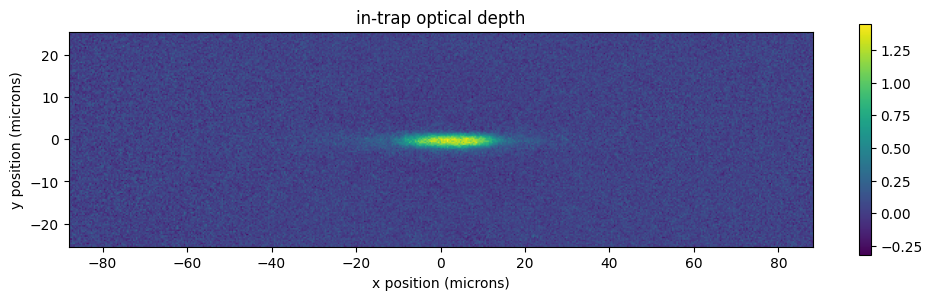

In [13]:
rows, cols = im_baseline.shape

pixcal = matter_baseline.output.it_plot.pixcal

x = np.linspace(-pixcal * cols / 2, pixcal * cols / 2, cols)
y = np.linspace(-pixcal * rows / 2, pixcal * rows / 2, rows)
xg, yg = np.meshgrid(x, y)

# Fit the experimental image to a 2D Gaussian function (imported at the beginning of the notebook)
# Order of imputs in Guassian_dist_2D (after the x-y meshgrid):
# amplitude, x_center, y_center, sigma_x, sigma_y, offset
initial_guess = [
    1,
    0,
    0,
    10,
    2,
    0,
]  # Initial 2D Gaussian parameters guess for the in-trap atom cloud size
bl = [0.3, -10, -10, 4, 0.5, -0.2]  # Lower bound for the parameters during fitting
bu = [3, 10, 10, 20, 5, 0.2]  # Upper bound for the parameters during fitting

popt, _ = opt.curve_fit(
    Gaussian_dist_2D, (xg, yg), im_baseline.ravel(), p0=initial_guess, bounds=(bl, bu)
)

# Print some of the fit parameters
sigma_x, sigma_y = (popt[3], popt[4])

print("Fit parameters: ")
print(f"Sigma-x = {sigma_x:.1f} um")
print(f"Sigma-y = {sigma_y:.1f} um")
print(f"Peak optical depth = {popt[0]:.2f}")

# Plot the experimental image
matter_baseline.output.plot_it()

## Measure the atom number from time-of-flight ##

Having estimated the volume of the BEC while in-trap, we now measure the total atom number using a time-of-flight measurement.

The cell below will run one TOF job to measure the total atom number in our BEC.

In [14]:
matter_tof = qmf.create_quantum_matter(
    temperature=temp,
    lifetime=1,
    image="TIME_OF_FLIGHT",
    name="Demo #4: TOF image for atom number",
)

matter_tof.submit(track=True)

Submitting 1 job(s):

- Job: Demo #4: TOF image for atom number
  Job ID: ea385b33-f7e9-4f0b-976d-db74a9a3c7e2

Tracking 1 job(s):

- Job: Demo #4: TOF image for atom number
  - RUNNING
  - COMPLETE

All job(s) complete


Since TOF jobs are automatically fit to extract the total atom number, we can use this fitted value in our calculations. Here we also plot the resulting TOF image.

Condensed atom number: 8363


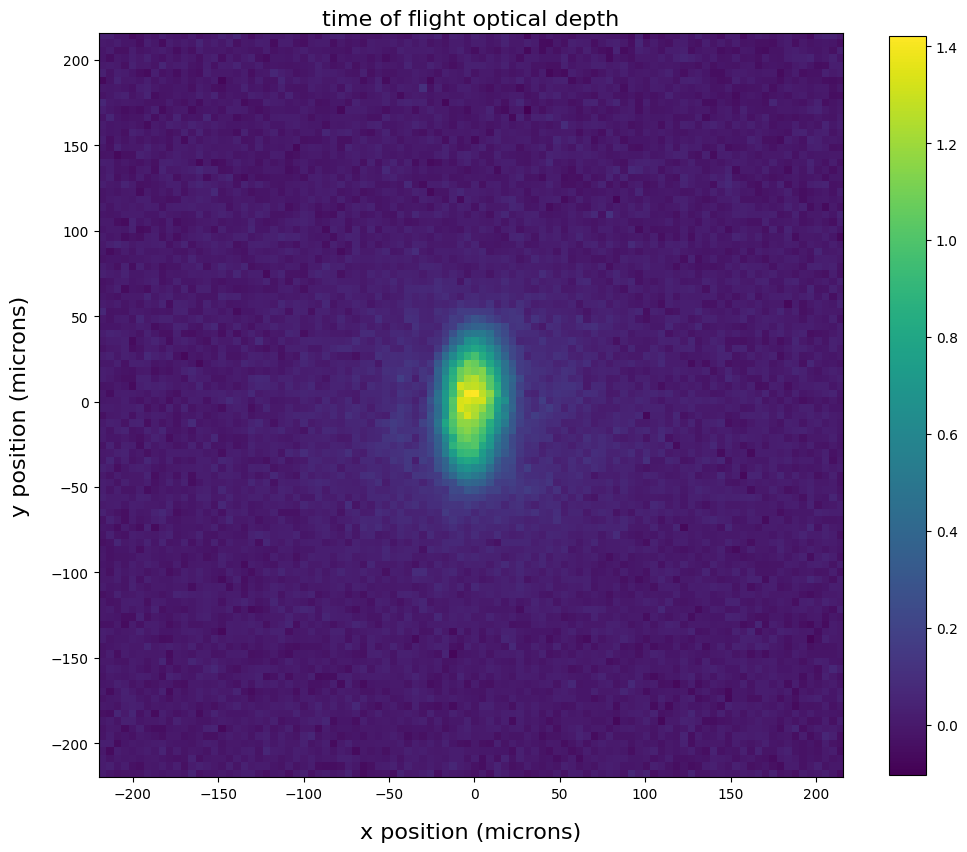

In [15]:
matter_tof.get_result()
N_atoms = matter_tof.output.condensed_atom_number
print(f"Condensed atom number: {N_atoms:.0f}")
matter_tof.output.plot_tof()

## Calculating the expected speed of sound in the BEC ##

Finally, we have enough data to calculate the expected Bogoliubuv speed of sound in our experiment! We calculate the speed based on the peak density in the center of the atom cloud. 

In [16]:
# Define constants, all in SI units
hbar = 1.055e-34  # reduced Plank's constant
m = 1.443e-25  # mass of Rubidium 87
a_s = 95 * 0.529e-10  # the scattering length of rubidium-87

# Calculate the peak atom density
V = 4 / 3 * np.pi * (1e-6 * sigma_x) * (1e-6 * sigma_y) ** 2  # units of meters^3
U = 4 * np.pi * hbar**2 * a_s / m
average_density = N_atoms / V
peak_density = 2 * average_density
print(f"Peak atom number density in-trap: {1e-6*peak_density:.1E} 1/cm^3")

# Calculate the speed of sound
v_s = np.sqrt(peak_density * U / m / 2)
print(f"Speed of sound in BEC: {1e3 * v_s:.2f} mm/s")

Peak atom number density in-trap: 3.8E+14 1/cm^3
Speed of sound in BEC: 2.55 mm/s


You should see that the expected speed of sound is around 2 mm/s, very close to what we see in the experiment!